In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("D:/RM_Linear-Regression/linear_regression_dataset.csv")

if dataset.isnull().sum().sum() > 0:
    dataset = dataset.dropna()

X = dataset[['AGE', 'FEMALE', 'LOS', 'RACE', 'APRDRG']].values  
y = dataset['TOTCHG'].values

x_mean=np.mean(X,axis=0)
x_std=np.std(X,axis=0)
X=(X-x_mean)/x_std

y_mean=np.mean(y,axis=0)
y_std=np.std(y,axis=0)
y=(y-y_mean)/y_std

split_index = int(0.8 * len(X))

X_train = X[:split_index] 
Y_train = y[:split_index]  

X_test = X[split_index:]   
Y_test = y[split_index:] 

In [140]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.wts = None
        self.bias = None

    def fit(self, X, y):
        self.m, self.n = X.shape  
        self.wts = np.zeros((self.n,1)) 
        self.bias = 0
        self.X = X
        self.y=y.reshape(-1,1)

        for i in range(self.n_iters):
            self.update_wts()

    def update_wts(self):
        y_pred = self.predict(self.X) 
        dw = -(self.X.T.dot(self.y - y_pred)) / self.m
        db = -np.sum(self.y - y_pred) / self.m
        self.wts -= self.lr * dw
        self.bias -= self.lr * db
        
    def predict(self, X):
        return np.dot(X, self.wts) + self.bias

    def print_weights(self):
        print("Weights for the respective features are:")
        print(self.wts)
        print()
        print("Bias value for the regression is", self.bias)

In [141]:
model=LinearRegression(lr=0.003,n_iters=1000)
model.fit(X_train,Y_train)
model.print_weights()
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

Weights for the respective features are:
[[ 0.22047092]
 [-0.04461066]
 [ 0.62288064]
 [-0.03235441]
 [-0.33139476]]

Bias value for the regression is 0.005724982618051024


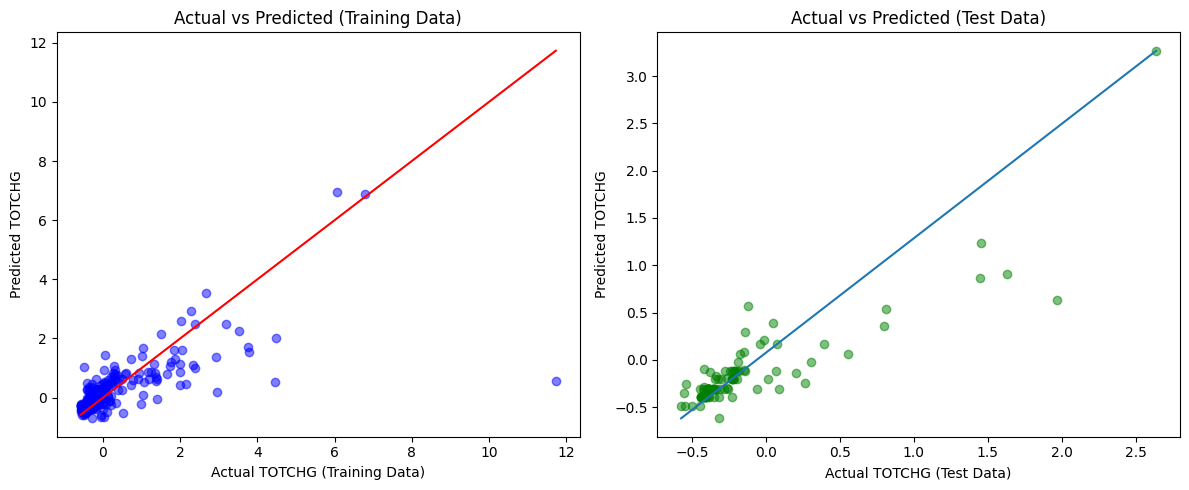

In [142]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(Y_train, y_pred_train, color="blue", alpha=0.5)
plt.xlabel("Actual TOTCHG (Training Data)")
plt.ylabel("Predicted TOTCHG")
plt.title("Actual vs Predicted (Training Data)")
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()],'r')

# Scatter plot of true vs predicted values for test data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_pred_test, color="green", alpha=0.5)
plt.xlabel("Actual TOTCHG (Test Data)")
plt.ylabel("Predicted TOTCHG")
plt.title("Actual vs Predicted (Test Data)")
plt.plot([Y_test.min(),Y_test.max()],[y_pred_test.min(),y_pred_test.max()])

plt.tight_layout()
plt.show()